In this notebook, let us explore the dataset that is given for this competition.

在这份笔记中，让我们来探索一下如何解决挑战提出的问题。

**目标 （Objective）**

This dataset contains an anonymized set of variables that describe different Mercedes cars. The ground truth is labeled 'y' and represents the time (in seconds) that the car took to pass testing. 

这个数据集包含了一系列描述奔驰车辆的匿名的属性。已知，标记 ‘y’ 的含义和按秒计算汽车通过测试的时间。

Let us first import the necessary modules.

In [120]:
import numpy as np # linear algebra 线性代数库
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 数据处理库
import matplotlib.pyplot as plt  # 图形库
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999

from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

test.csv
train.csv



In [121]:
train_df = pd.read_csv("input/train.csv")
test_df = pd.read_csv("input/test.csv")
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


Wow the number of rows are small with 388 columns. We should try not to overfit :)

Let us look at the top few rows.

In [122]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

**Target Variable:**

"y" is the variable we need to predict. So let us do some analysis on this variable first.

“y” 是我们想要预测的属性。所以我们来对这个变量做一些分析

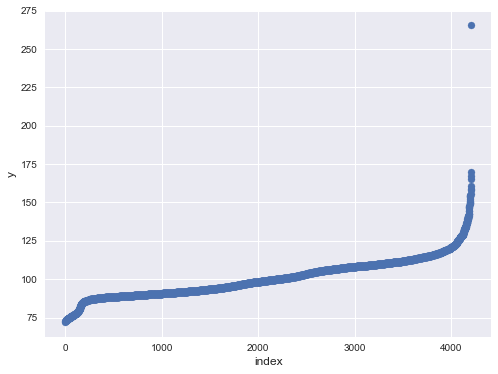

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

注意离群点。

Seems like a single data point is well above the rest. 

Now let us plot the distribution graph.

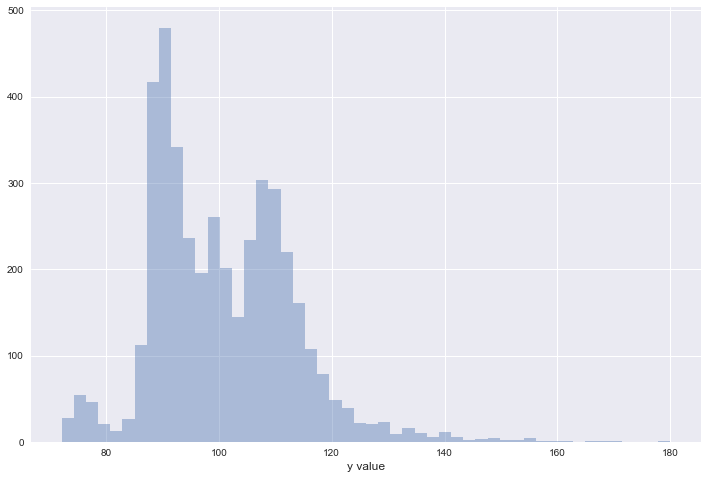

In [124]:
ulimit = 180

# 下面这行语句比较难懂，不过大概功能是去掉离散点，
# 
# train_df["y"] 是 <class 'pandas.core.series.Series'>
# train_df['y'] > ulimit 的结果也是 <class 'pandas.core.series.Series'>
train_df['y'].ix[train_df['y'] > ulimit] = ulimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

Now let us have a look at the data type of all the variables present in the dataset.

In [125]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


So majority of the columns are integers with 8 categorical columns and 1 float column (target variable)

所以大部分的列都是整数类型，不过有 8 个明确分类的列和一个浮点数列。

In [126]:
# 取 indexer 的前 10 个列的数据
dtype_df.ix[:10,:]

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


X0 to X8 are the categorical columns.

X0-X8 是以及分类的列。

**Missing values:**

Let us now check for the missing values.

让我们来查看一下缺失的值。

In [127]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


Good to see that there are no missing values in the dataset :) 

数据集里并没有缺失的值。

**Integer Columns Analysis:**

In [128]:
unique_values_dict = {}
for col in train_df.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(train_df[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")
        

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

经过上面的检查我们可知，所有的整数列的值要不是 0 要不是 1，有一些整数列的值只有 0.所以，我们建模的时候可以排除这些只有 0 的列。

So all the integer columns are binary with some columns have only one unique value 0. Possibly we could exclude those columns in our modeling activity.

然后我们探索一下已经分类的列。

Now let us explore the categorical columns present in the dataset.

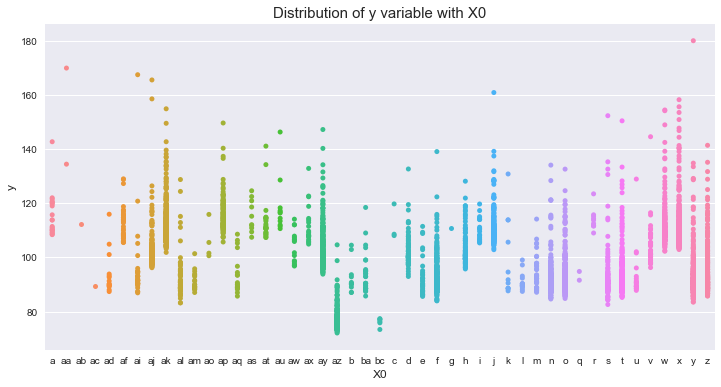

In [129]:
var_name = "X0"
col_order = np.sort(train_df[var_name].unique()).tolist()
# 取 x0 所有可能值，并按列表排序

plt.figure(figsize=(12,6))
# 设置图标大小

sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
# 使用 stripplot 图标类型，选择数据集 train_df, 横坐标 x0 纵坐标 y
# 并按照 x0 所有可能值列表排序

plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

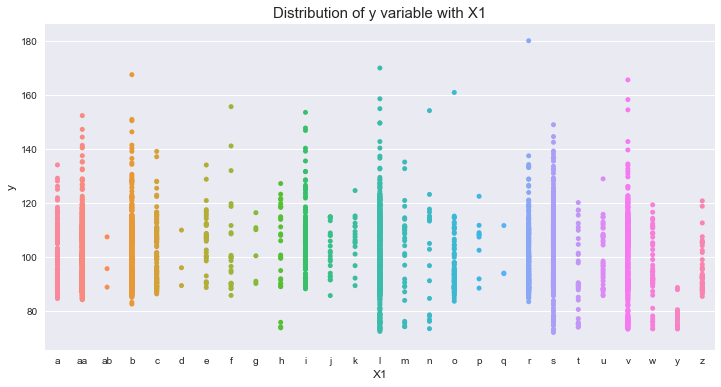

In [130]:
var_name = "X1"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

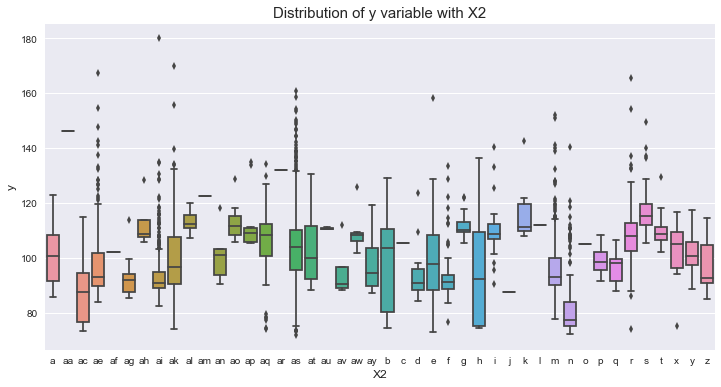

In [131]:
var_name = "X2"
col_order = np.sort(train_df[var_name].unique()).tolist()

plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
# 使用 boxplot 图标类型，选择数据集 train_df, 横坐标 x0 纵坐标 y
# 并按照 x0 所有可能值列表排序

plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

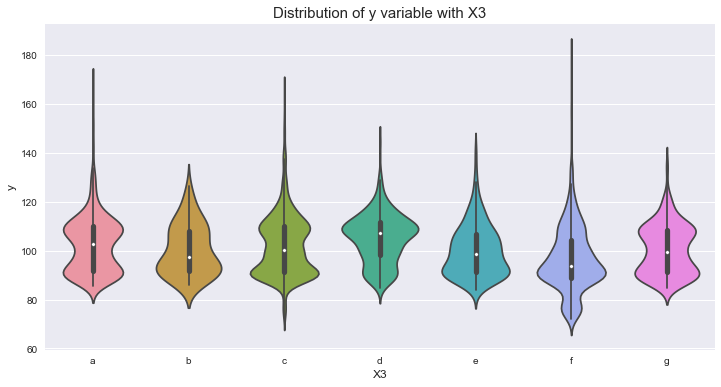

In [132]:
var_name = "X3"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

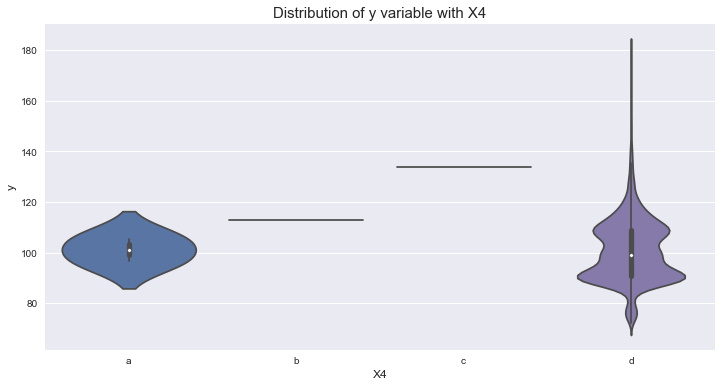

In [133]:
var_name = "X4"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=train_df, order=col_order)
# 使用 violinplot 图标类型，选择数据集 train_df, 横坐标 x0 纵坐标 y
# 并按照 x0 所有可能值列表排序

plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

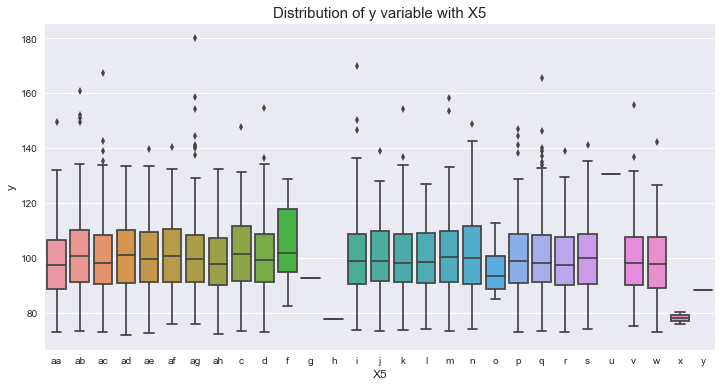

In [134]:
var_name = "X5"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
# 使用 boxplot 图标类型，选择数据集 train_df, 横坐标 x0 纵坐标 y
# 并按照 x0 所有可能值列表排序

plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

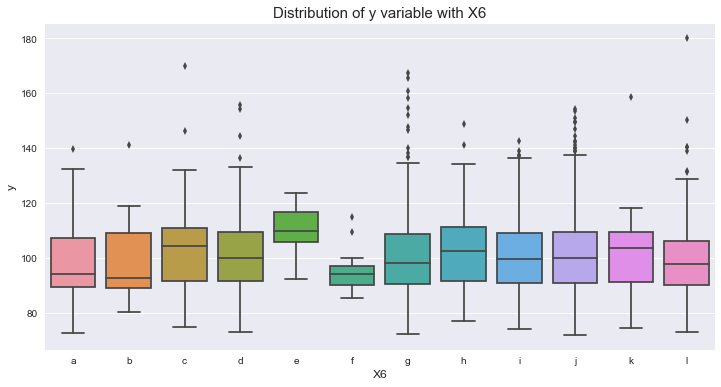

In [135]:
var_name = "X6"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
# 使用 boxplot 图标类型，选择数据集 train_df, 横坐标 x0 纵坐标 y
# 并按照 x0 所有可能值列表排序

plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

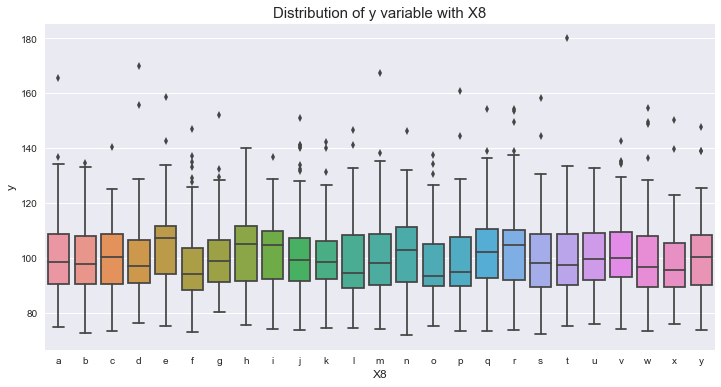

In [136]:
var_name = "X8"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

**Binary Variables:**

Now we can look into the binary variables. There are quite a few of them as we have seen before. Let us start with getting the number of 0's and 1's in each of these variables.

356
356


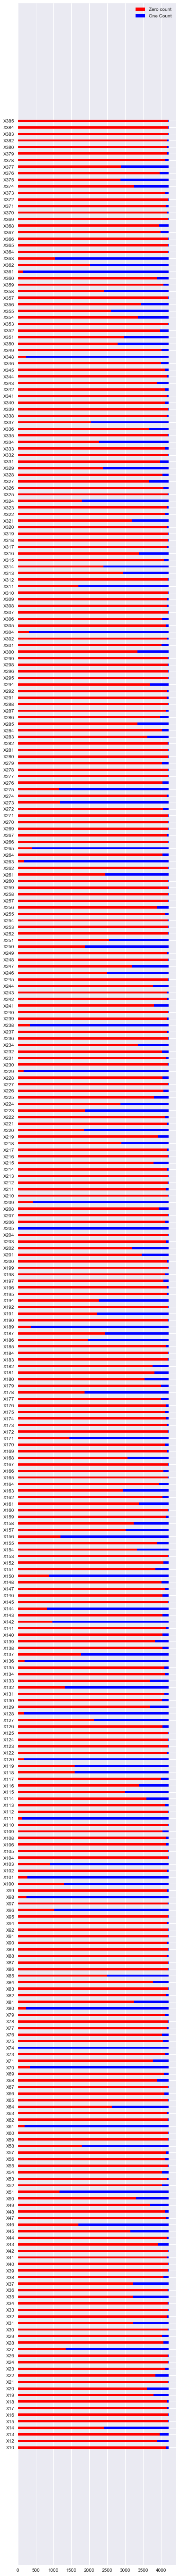

In [137]:
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((train_df[col]==0).sum())
    one_count_list.append((train_df[col]==1).sum())

# 获取 0，1 在整数列值各种的计数
print(len(zero_count_list))
print(len(one_count_list))

N = len(cols_list)
ind = np.arange(N)
width = 0.35

# 按照计数画 0，1 各自占值的分布图
plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

Now let us check the mean y value in each of the binary variable.

现在我们来看一下在每个整数列中 y 的平均值。

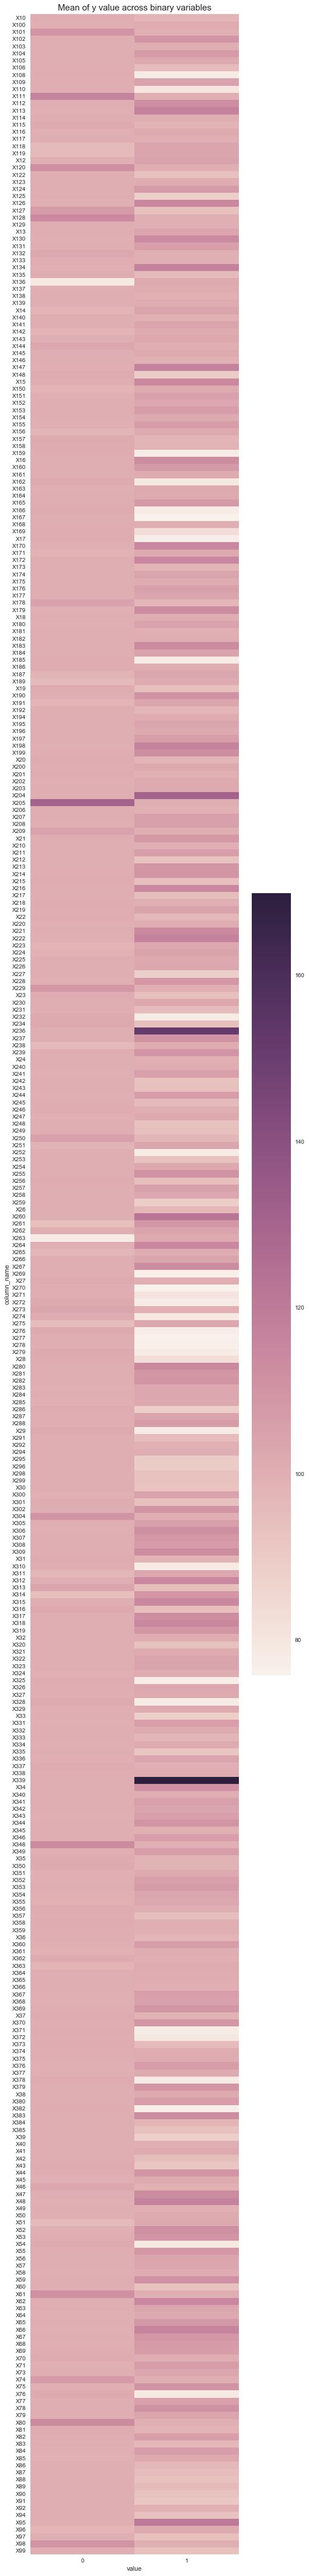

In [138]:

zero_mean_list = []
one_mean_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_mean_list.append(train_df.ix[train_df[col]==0].y.mean())
    one_mean_list.append(train_df.ix[train_df[col]==1].y.mean())

new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()

Binary variables which shows a good color difference in the above graphs between 0 and 1 are likely to be more predictive given the the count distribution is also good between both the classes (can be seen from the previous graph). We will dive more into the important variables in the later part of the notebook.

**ID variable:**

One more important thing we need to look at it is ID variable. This will give an idea of how the splits are done across train and test (random or id based) and also to help see if ID has some potential prediction capability (probably not so useful for business)

Let us first see how the 'y' variable changes with ID variable.

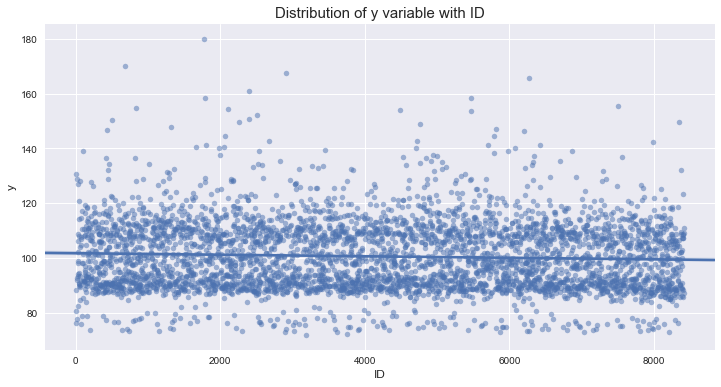

In [139]:
var_name = "ID"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='y', data=train_df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

看上去随着 id 的增长，y 值有微小的降低。

There seems to be a slight decreasing trend with respect to ID variable. Now let us see how the IDs are distributed across train and test.

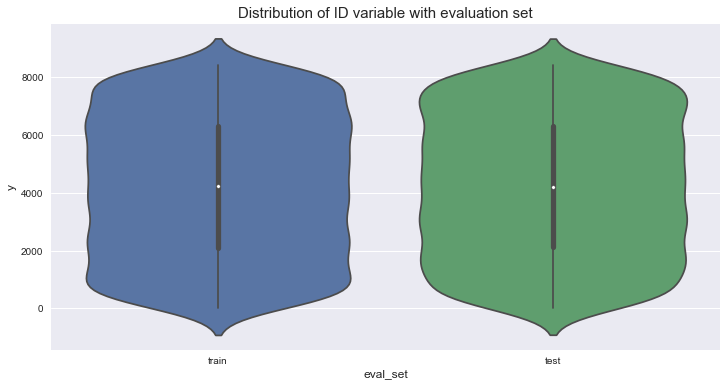

In [140]:
plt.figure(figsize=(6,10))
train_df['eval_set'] = "train"
test_df['eval_set'] = "test"
full_df = pd.concat([train_df[["ID","eval_set"]], test_df[["ID","eval_set"]]], axis=0)

plt.figure(figsize=(12,6))
sns.violinplot(x="eval_set", y='ID', data=full_df)
plt.xlabel("eval_set", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of ID variable with evaluation set", fontsize=15)
plt.show()

Seems like a random split of ID variable between train and test samples.

**Important Variables:**

Now let us run and xgboost model to get the important variables.

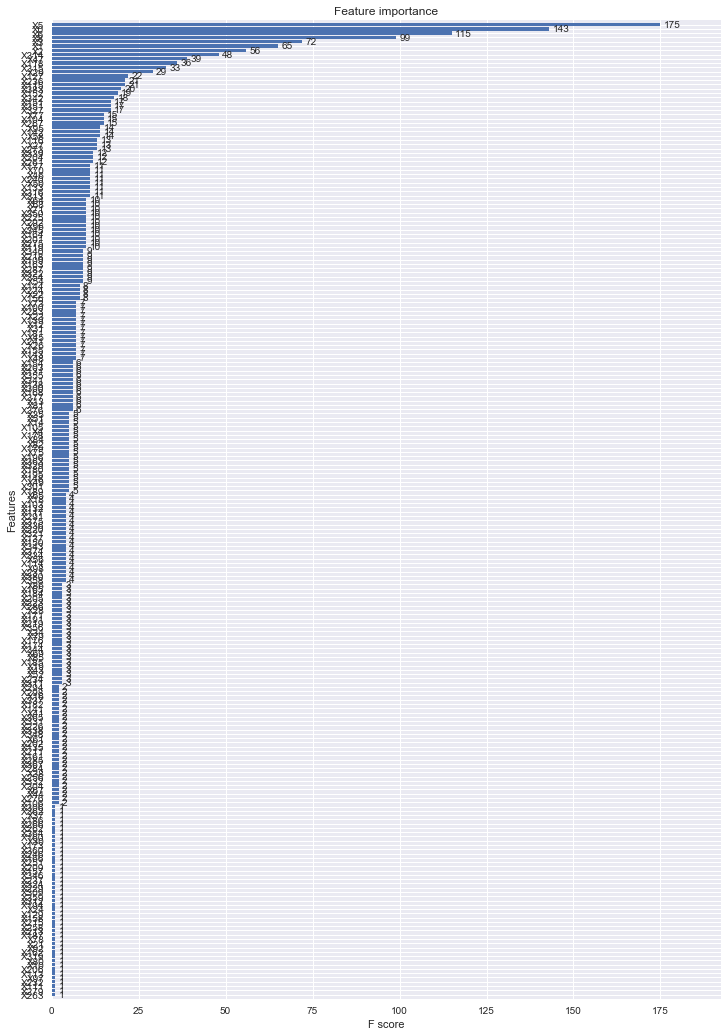

In [141]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = train_df['y'].values
train_X = train_df.drop(["ID", "y", "eval_set"], axis=1)

# Thanks to anokas for this #
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
# xgboost v0.6.0+ will add "max_num_features", not now.
# xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
xgb.plot_importance(model, height=0.8, ax=ax)

plt.show()

Categorical occupy the top spots followed by binary variables. 

Let us also build a Random Forest model and check the important variables.

In [ ]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feat_names = train_X.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

Quite a few differences in the important variables between xgboost and random forest. Not sure why though.!

**More to come. Stay tuned.!**

**Please upvote if you like it.!**